In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]


In [0]:
stockStartDate = '2013-01-01'

In [4]:
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2020-02-03


In [5]:
numAssets = len(stockSymbols)
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    #data = web.get_data_yahoo(stocks, start = start, end = end)[col]
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [7]:
my_stocks = getMyPortfolio(stockSymbols)
print(my_stocks)

Symbols             FB         AMZN        AAPL        NFLX         GOOG
Date                                                                    
2013-01-02   28.000000   257.309998   68.850548   13.144286   360.274597
2013-01-03   27.770000   258.480011   67.981491   13.798572   360.483826
2013-01-04   28.760000   259.149994   66.087891   13.711429   367.607117
2013-01-07   29.420000   268.459991   65.699158   14.171429   366.003143
2013-01-08   29.059999   266.380005   65.875954   13.880000   365.280823
...                ...          ...         ...         ...          ...
2020-01-28  217.789993  1853.250000  317.690002  348.519989  1452.560059
2020-01-29  223.229996  1858.000000  324.339996  343.160004  1458.630005
2020-01-30  209.529999  1870.680054  323.869995  347.739990  1455.839966
2020-01-31  201.910004  2008.719971  309.510010  345.089996  1434.229980
2020-02-03  204.649994  2036.449951  312.500000  356.600006  1475.939941

[1784 rows x 5 columns]


In [0]:
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
    title = 'Portfolio ' + col + ' Price History'
    my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
    plt.figure(figsize=(25,30)) #width /inch, height 
    for c in my_stocks.columns.values:
      plt.plot( my_stocks[c],  label=c)
    #plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
    plt.title(title)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel(col +' Price USD ($)',fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

In [0]:
showGraph(stockSymbols)

In [0]:
daily_simple_returns = my_stocks.pct_change(1)
# monthly_simple_returns = my_stocks.pct_change(21) 
# 21 for ONE MONTH lookback for each individual return
# annual_simple_returns = my_stocks.pct_change(253) 
# 253 for ONE YEAR lookback for each individual return
print(daily_simple_returns)

In [18]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.471148,0.345252,0.315518,0.494348
AMZN,0.471148,1.000000,0.367820,0.405746,0.581665
AAPL,0.345252,0.367820,1.000000,0.200710,0.429972
NFLX,0.315518,0.405746,0.200710,1.000000,0.393591
GOOG,0.494348,0.581665,0.429972,0.393591,1.000000


In [19]:
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000419,0.000179,0.000111,0.000186,0.000148
AMZN,0.000179,0.000343,0.000107,0.000217,0.000158
AAPL,0.000111,0.000107,0.000248,0.000091,0.000099
NFLX,0.000186,0.000217,0.000091,0.000832,0.000167
GOOG,0.000148,0.000158,0.000099,0.000167,0.000215


In [20]:
daily_simple_returns.var()

Symbols
FB      0.000419
AMZN    0.000343
AAPL    0.000248
NFLX    0.000832
GOOG    0.000215
dtype: float64

In [21]:
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.020463
AMZN    0.018521
AAPL    0.015734
NFLX    0.028851
GOOG    0.014674
dtype: float64

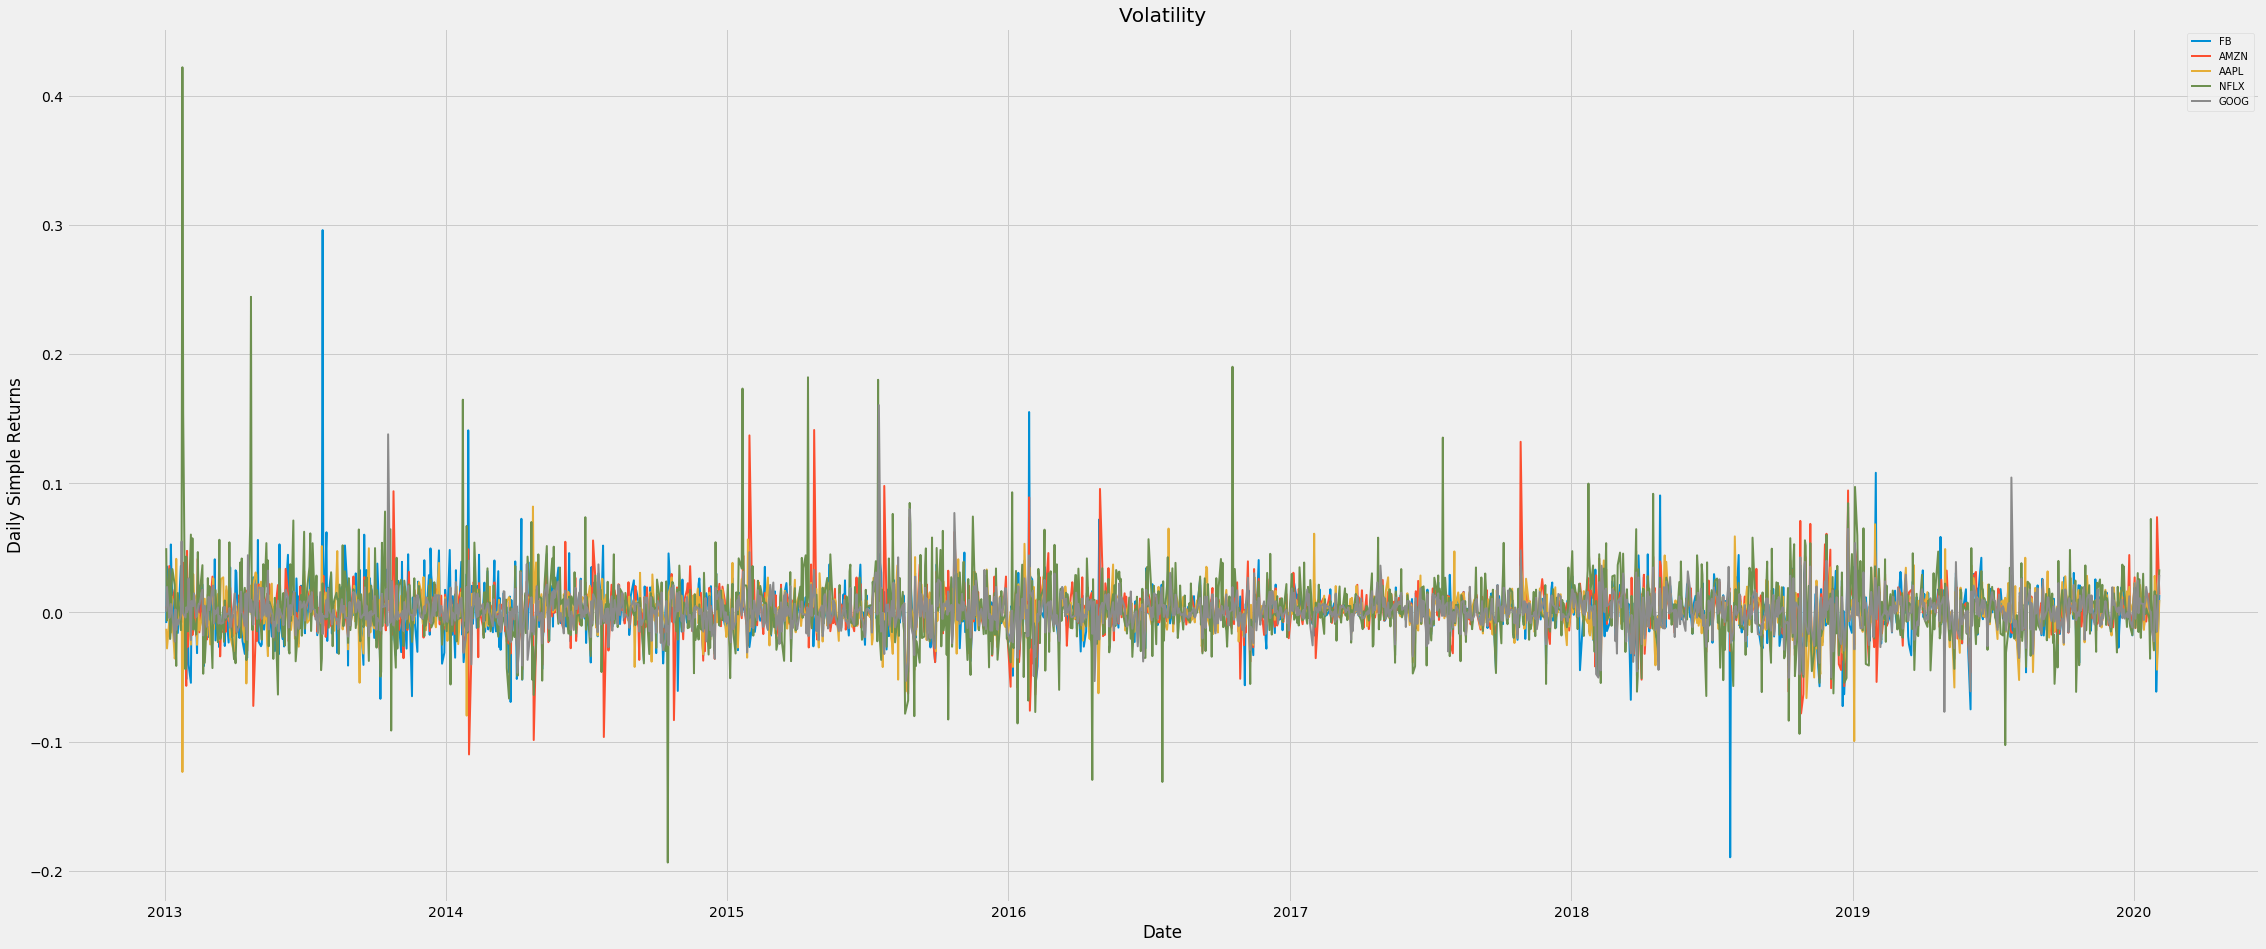

In [28]:
plt.figure(figsize=(35,15))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
  #plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()

In [29]:
dailyMeanSimpleReturns = daily_simple_returns.mean() 
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001322
AMZN    0.001331
AAPL    0.000973
NFLX    0.002253
GOOG    0.000898
dtype: float64


In [0]:
# [0.4, 0.1, 0.3,0.1,0.1] => 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) 
#NOTE: Be sure to account for rounding of decimal

In [32]:
print("The daily expected portfolio return: " +str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0012688467492070659


In [33]:
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.3210182275493877


In [34]:
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
print(dailyCumulSimplReturn)

Symbols           FB      AMZN      AAPL       NFLX      GOOG
Date                                                         
2013-01-02       NaN       NaN       NaN        NaN       NaN
2013-01-03  0.991786  1.004547  0.987378   1.049777  1.000581
2013-01-04  1.027143  1.007151  0.959875   1.043147  1.020353
2013-01-07  1.050714  1.043333  0.954229   1.078144  1.015900
2013-01-08  1.037857  1.035249  0.956796   1.055972  1.013896
...              ...       ...       ...        ...       ...
2020-01-28  7.778214  7.202402  4.614197  26.514942  4.031814
2020-01-29  7.972500  7.220862  4.710783  26.107162  4.048662
2020-01-30  7.483214  7.270141  4.703957  26.455601  4.040918
2020-01-31  7.211072  7.806615  4.495389  26.253993  3.980936
2020-02-03  7.308928  7.914383  4.538816  27.129659  4.096708

[1784 rows x 5 columns]


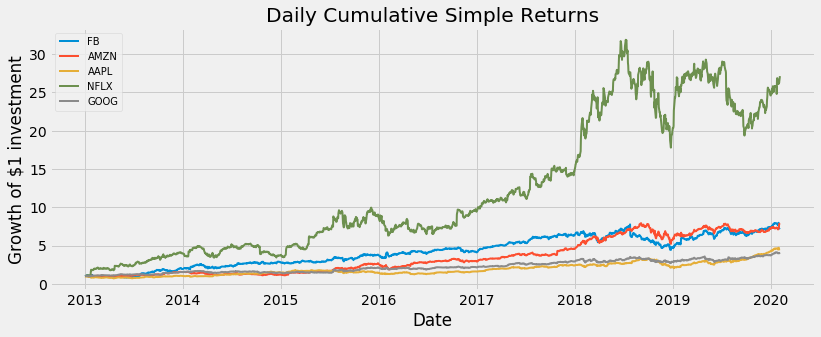

In [35]:
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)
  #plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()
